<a href="https://colab.research.google.com/github/KniteenK/Drone-Detection-System/blob/main/notebookbcc641674d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

niketagarwal653_drone_dataset_path = kagglehub.dataset_download('niketagarwal653/drone-dataset')

print('Data source import complete.')


In [ ]:
import numpy as np
import pandas as pd
from scipy.io import wavfile
import os

# Define the paths for the two categories (yes_drone and unknown)
yes_drone_path = '/kaggle/input/drone-dataset/Binary_Drone_Audio/yes_drone'
unknown_path = '/kaggle/input/drone-dataset/Binary_Drone_Audio/unknown'

# Initialize lists to store file paths, labels, sampling rates, and durations
file_paths = []
labels = []
sampling_rates = []
durations = []
errors = []

# Function to extract WAV info
def get_wav_info(file_path):
    try:
        sampling_rate, data = wavfile.read(file_path)
        duration = len(data) / sampling_rate
        return {"sampling_rate": sampling_rate, "duration": duration}
    except Exception as e:
        return {"error": str(e)}

# Load audio files from 'yes_drone' directory
for filename in os.listdir(yes_drone_path):
    file_path = os.path.join(yes_drone_path, filename)
    if file_path.endswith('.wav'):  # Ensure you're only picking up audio files
        file_paths.append(file_path)
        labels.append('yes_drone')
        wav_info = get_wav_info(file_path)
        sampling_rates.append(wav_info.get("sampling_rate"))
        durations.append(wav_info.get("duration"))
        errors.append(wav_info.get("error"))

# Load audio files from 'unknown' directory
for filename in os.listdir(unknown_path):
    file_path = os.path.join(unknown_path, filename)
    if file_path.endswith('.wav'):  # Ensure you're only picking up audio files
        file_paths.append(file_path)
        labels.append('unknown')
        wav_info = get_wav_info(file_path)
        sampling_rates.append(wav_info.get("sampling_rate"))
        durations.append(wav_info.get("duration"))
        errors.append(wav_info.get("error"))

# Create a DataFrame to organize the data
audio_data = pd.DataFrame({
    'file_path': file_paths,
    'label': labels,
    'sampling_rate': sampling_rates,
    'duration': durations,
    'error': errors
})

# Display the first few rows of the DataFrame
print(audio_data.head())
print(audio_data)

# Count the occurrences of each label (yes_drone and unknown)
label_counts = audio_data['label'].value_counts()
print("Label counts:\n", label_counts)

# Print any errors encountered
print("Errors encountered during audio file processing:")
print(audio_data[audio_data['error'].notnull()])

# Calculate and display average duration and sampling rate for each category
for label in audio_data['label'].unique():
    subset = audio_data[(audio_data['label'] == label) & (audio_data['error'].isnull())]
    avg_duration = subset['duration'].mean()
    avg_sampling_rate = subset['sampling_rate'].mean()
    print(f"\nCategory: {label}")
    print(f"Average Duration: {avg_duration:.2f} seconds")
    print(f"Average Sampling Rate: {avg_sampling_rate:.2f} Hz")


                                           file_path      label  \
0  /kaggle/input/drone-dataset/Binary_Drone_Audio...  yes_drone   
1  /kaggle/input/drone-dataset/Binary_Drone_Audio...  yes_drone   
2  /kaggle/input/drone-dataset/Binary_Drone_Audio...  yes_drone   
3  /kaggle/input/drone-dataset/Binary_Drone_Audio...  yes_drone   
4  /kaggle/input/drone-dataset/Binary_Drone_Audio...  yes_drone   

   sampling_rate  duration error  
0          16000     1.024  None  
1          16000     1.024  None  
2          16000     1.024  None  
3          16000     1.024  None  
4          16000     1.024  None  
                                               file_path      label  \
0      /kaggle/input/drone-dataset/Binary_Drone_Audio...  yes_drone   
1      /kaggle/input/drone-dataset/Binary_Drone_Audio...  yes_drone   
2      /kaggle/input/drone-dataset/Binary_Drone_Audio...  yes_drone   
3      /kaggle/input/drone-dataset/Binary_Drone_Audio...  yes_drone   
4      /kaggle/input/drone-datas

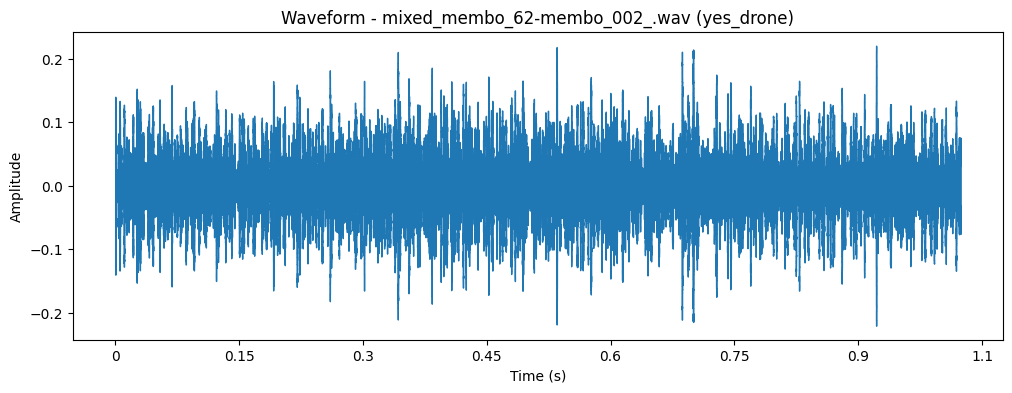

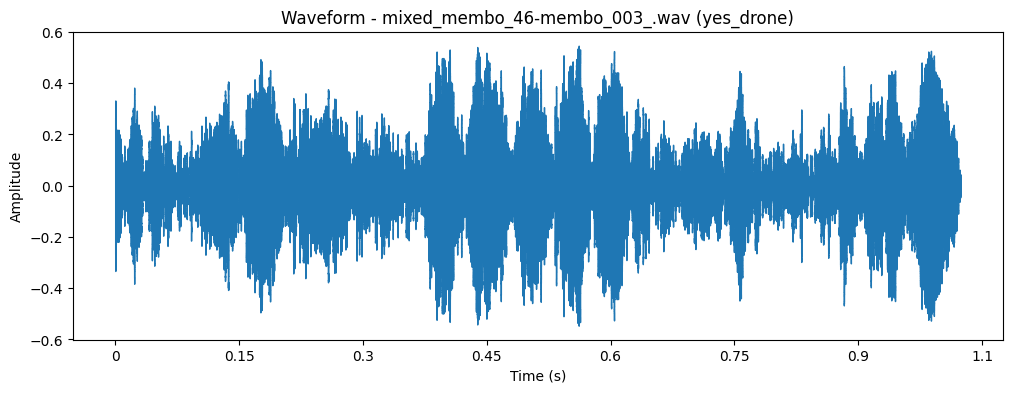

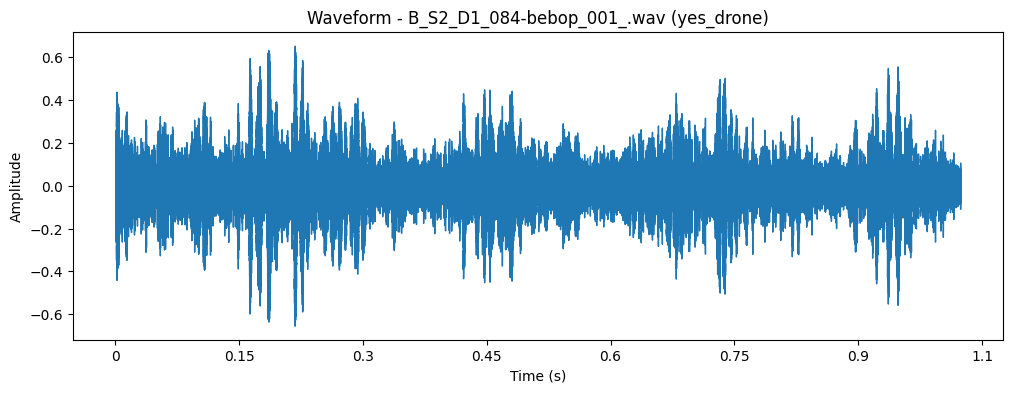

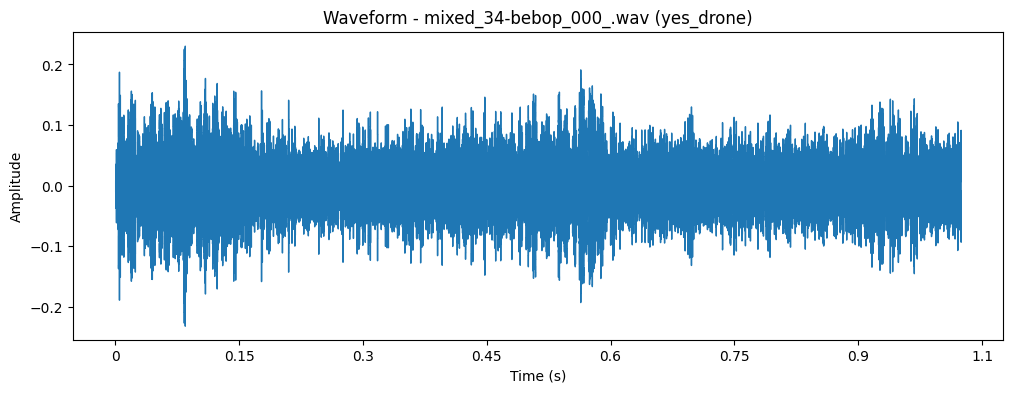

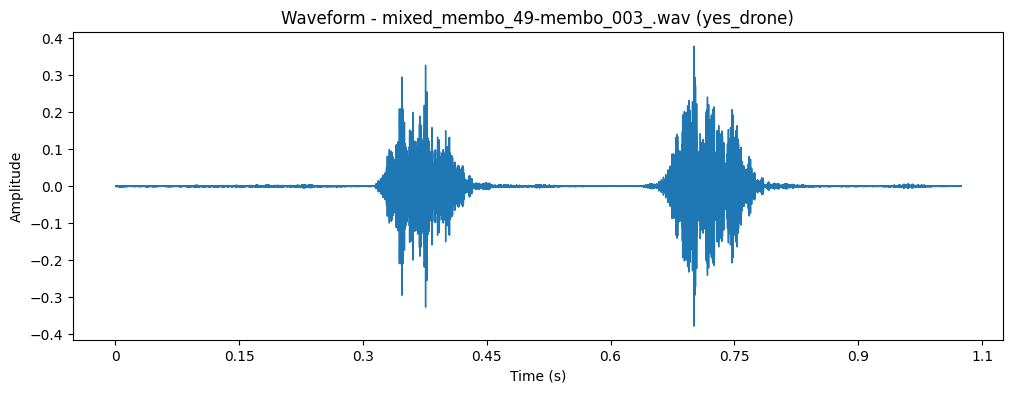

KeyboardInterrupt: 

<Figure size 1200x400 with 0 Axes>

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import os

# Function to plot waveform for a given audio file
def plot_waveform(file_path):
    try:
        # Load the audio file using librosa
        audio_data, sr = librosa.load(file_path, sr=None)

        # Extract the directory name (either 'yes_drone' or 'unknown')
        directory_name = os.path.basename(os.path.dirname(file_path))

        # Plot the waveform
        plt.figure(figsize=(12, 4))
        librosa.display.waveshow(audio_data, sr=sr)
        plt.title(f"Waveform - {os.path.basename(file_path)} ({directory_name})")
        plt.xlabel("Time (s)")
        plt.ylabel("Amplitude")
        plt.show()

    except Exception as e:
        print(f"Error loading {file_path}: {e}")

# Assuming your DataFrame `df` is already loaded with 'file_path' columns

# Plot the waveform for each audio file
for ind, row in audio_data.iterrows():
    audio_file_path = row['file_path']
    plot_waveform(audio_file_path)  # Call the separate function for plotting


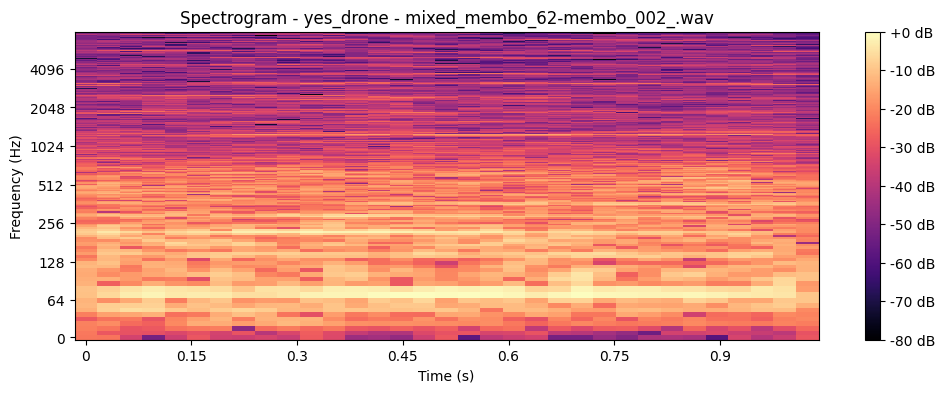

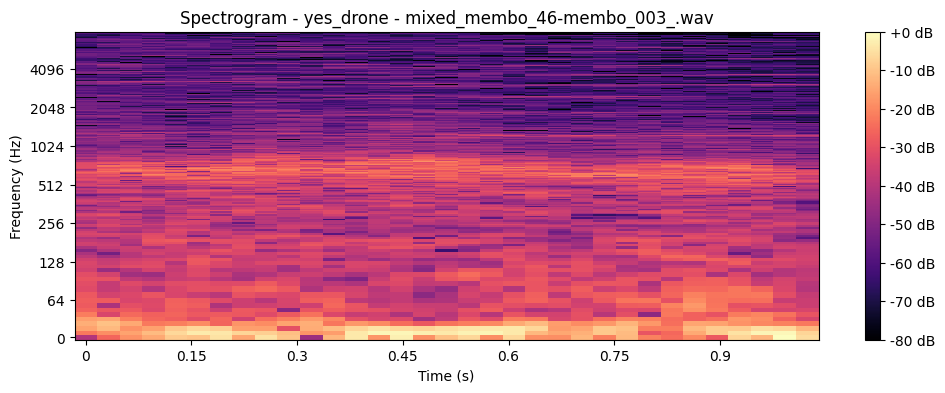

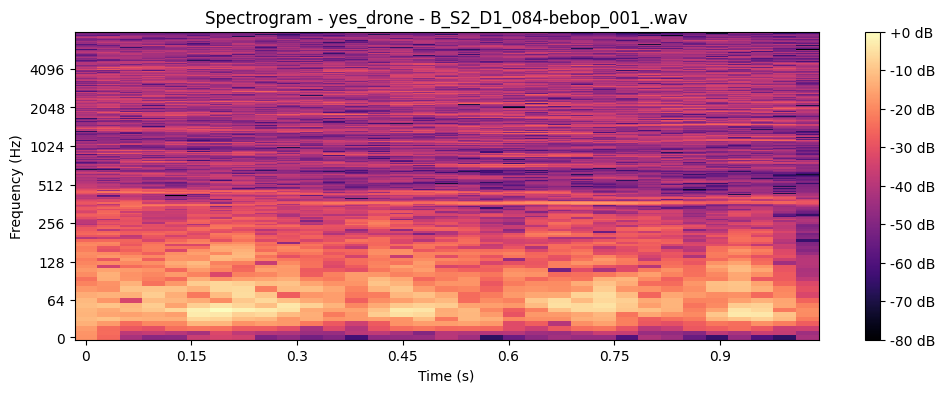

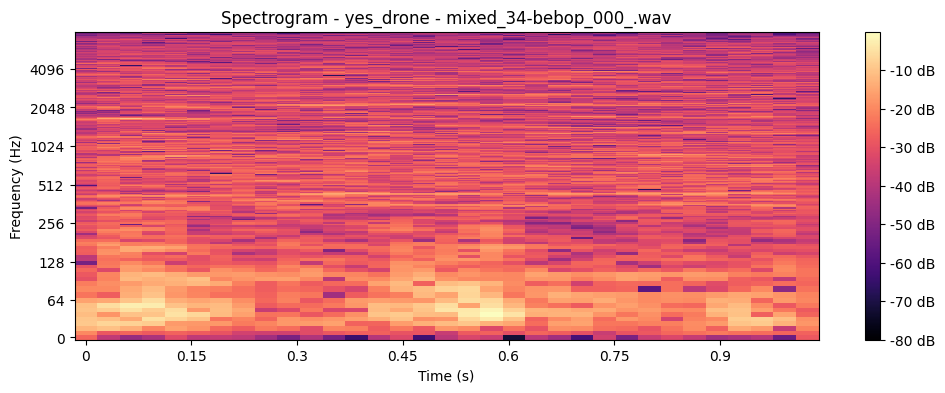

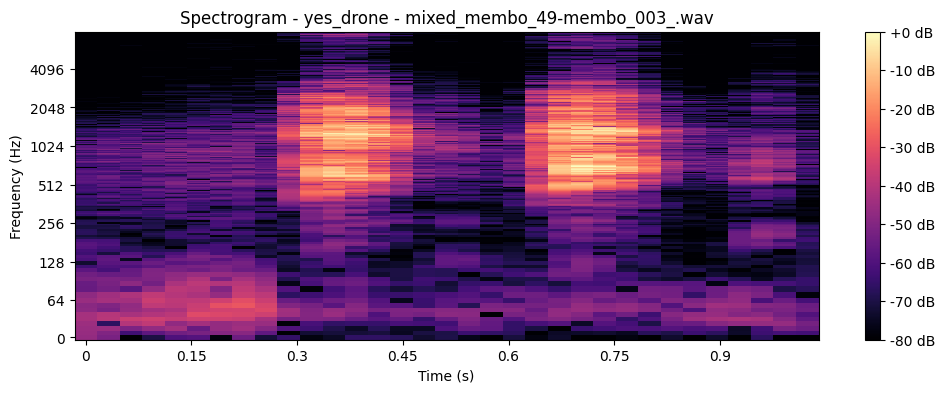

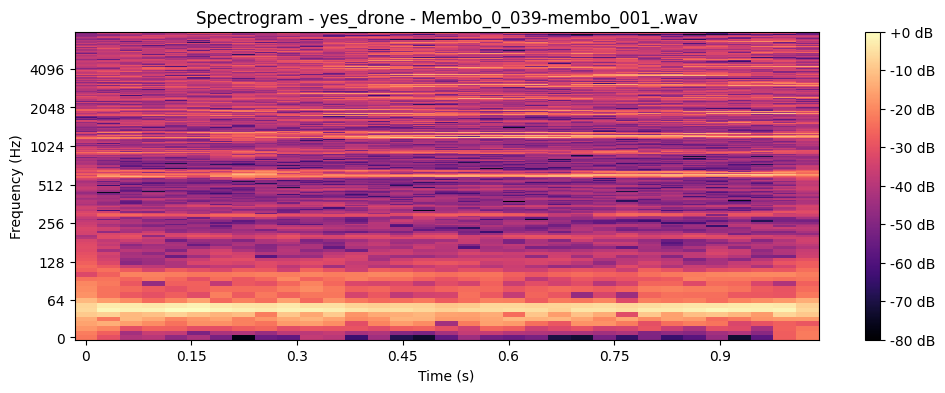

KeyboardInterrupt: 

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import os

# Function to plot spectrogram for a given audio file
def plot_spectrogram(audio_file_path):
    try:
        # Load the audio file using librosa
        audio_data, sr = librosa.load(audio_file_path, sr=None)

        # Get the directory name (yes_drone or unknown)
        directory_name = os.path.basename(os.path.dirname(audio_file_path))

        # Compute the Short-Time Fourier Transform (STFT)
        D = np.abs(librosa.stft(audio_data))

        # Convert to decibels (log scale)
        DB = librosa.amplitude_to_db(D, ref=np.max)

        # Plot the spectrogram
        plt.figure(figsize=(12, 4))
        librosa.display.specshow(DB, sr=sr, x_axis='time', y_axis='log', cmap='magma')
        plt.colorbar(format='%+2.0f dB')
        plt.title(f"Spectrogram - {directory_name} - {os.path.basename(audio_file_path)}")
        plt.xlabel("Time (s)")
        plt.ylabel("Frequency (Hz)")
        plt.show()

    except Exception as e:
        print(f"Error loading {audio_file_path}: {e}")

# Assuming your DataFrame `df` is already loaded with 'file_path' columns
# Plot the spectrogram for each audio file
for ind, row in audio_data.iterrows():
    audio_file_path = row['file_path']
    plot_spectrogram(audio_file_path)  # Call the function for plotting the spectrogram


In [ ]:
import tensorflow as tf

# Define paths for the two categories
POS = '/kaggle/input/drone-dataset/Binary_Drone_Audio/yes_drone'
NEG = '/kaggle/input/drone-dataset/Binary_Drone_Audio/unknown'

# Load files into TensorFlow dataset format
pos = tf.data.Dataset.list_files(POS + '/*.wav')
neg = tf.data.Dataset.list_files(NEG + '/*.wav')

# Assign labels to audio files (1 for positive, 0 for negative)
positives = tf.data.Dataset.zip((pos, tf.data.Dataset.from_tensor_slices(tf.ones(len(pos)))))
negatives = tf.data.Dataset.zip((neg, tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg)))))

# Combine the positive and negative datasets
data = positives.concatenate(negatives)
print(data)


<_ConcatenateDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))>


In [ ]:
# List to store lengths of audio files
lengths = []

# Calculate the length of each audio file in the yes_drone directory
for filename in os.listdir(yes_drone_path):
    file_path = os.path.join(yes_drone_path, filename)
    if file_path.endswith('.wav'):
        wav_info = get_wav_info(file_path)
        if wav_info.get("duration"):
            lengths.append(wav_info["duration"])

# Convert lengths list to TensorFlow tensor for analysis
lengths_tensor = tf.constant(lengths)

# Calculate average, minimum, and maximum lengths
average_length = tf.reduce_mean(lengths_tensor)
min_length = tf.reduce_min(lengths_tensor)
max_length = tf.reduce_max(lengths_tensor)

# Print the results
print("Average length of drone call:", average_length.numpy())
print("Minimum length of drone call:", min_length.numpy())
print("Maximum length of drone call:", max_length.numpy())


Average length of drone call: 1.000614
Minimum length of drone call: 0.6499375
Maximum length of drone call: 1.024


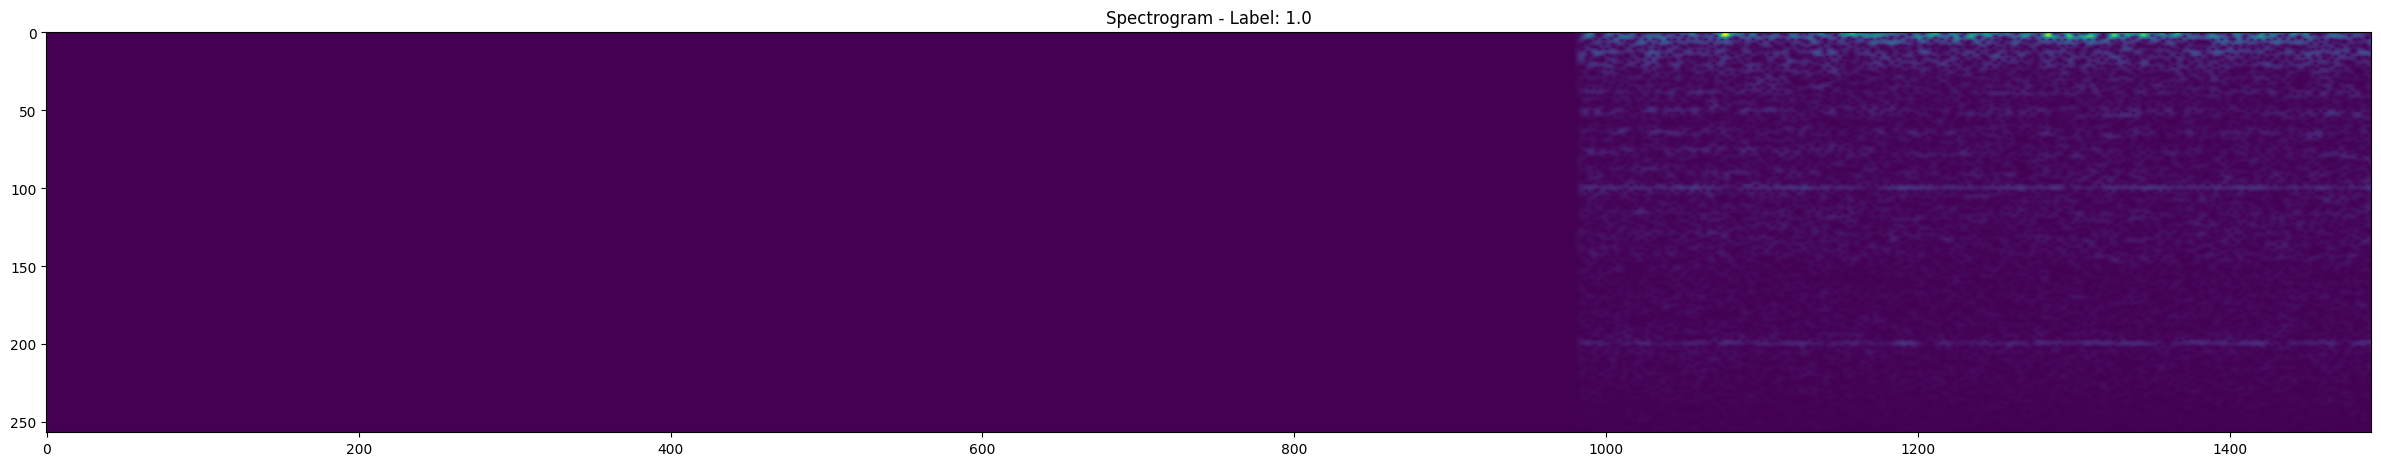

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Function to load the audio and convert it to a spectrogram
def preprocess(file_path, label):
    wav, _ = tf.audio.decode_wav(tf.io.read_file(file_path))
    wav = tf.squeeze(wav, axis=-1)  # Remove the extra dimension
    wav = wav[:48000]  # Limit to the first 48000 samples
    zero_padding = tf.zeros([48000] - tf.shape(wav), dtype=tf.float32)
    wav = tf.concat([zero_padding, wav], 0)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram, label

# Test the function by visualizing a spectrogram
filepath, label = positives.shuffle(buffer_size=10000).as_numpy_iterator().next()
spectrogram, label = preprocess(filepath, label)
plt.figure(figsize=(30, 20))
plt.imshow(tf.transpose(spectrogram)[0])
plt.title(f"Spectrogram - Label: {label}")
plt.show()


In [ ]:
# Define the paths for the positive (yes_drone) and negative (unknown) classes
POS = '/kaggle/input/drone-dataset/Binary_Drone_Audio/yes_drone'
NEG = '/kaggle/input/drone-dataset/Binary_Drone_Audio/unknown'

# Load the audio files into TensorFlow dataset format
pos = tf.data.Dataset.list_files(POS + '/*.wav')
neg = tf.data.Dataset.list_files(NEG + '/*.wav')

# Assign labels to audio files (1 for positive, 0 for negative)
positives = tf.data.Dataset.zip((pos, tf.data.Dataset.from_tensor_slices(tf.ones(len(pos)))))
negatives = tf.data.Dataset.zip((neg, tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg)))))

# Combine the positive and negative datasets
data = positives.concatenate(negatives)

# Apply the preprocessing function, cache, shuffle, batch, and prefetch for performance
data = data.map(preprocess)  # Apply the preprocessing function to each audio file
data = data.cache()  # Cache the data for quicker access during training
data = data.shuffle(buffer_size=1000)  # Shuffle data to randomize the order
data = data.batch(16)  # Batch the data in groups of 16
data = data.prefetch(8)  # Prefetch 8 batches ahead for optimal training

# Split the data into training and testing partitions (70% for training, 30% for testing)
train = data.take(36)  # Take the first 36 samples for training
test = data.skip(36).take(15)  # Skip the first 36 and take the next 15 for testing

# Test on a single batch from the training set
samples, labels = train.as_numpy_iterator().next()  # Get one batch of samples and labels
print(f"Samples shape: {samples.shape}")  # Output the shape of the samples

# The final output shape will be something like: (batch_size, time_steps, frequency_bins, 1)
# where time_steps and frequency_bins depend on the audio processing steps, and '1' is the spectrogram channel.


Samples shape: (16, 1491, 257, 1)


Train data shape: (1000, 1491, 257, 1)
Test data shape: (200, 1491, 257, 1)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 1489, 255, 16)  │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 744, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 742, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 371, 62, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 736064)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │    47,108,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,113,025 (179.72 MB)

 Trainable params: 47,113,025 (179.72 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/4
32/32 ━━━━━━━━━━━━━━━━━━━━ 205s 6s/step - accuracy: 0.4880 - loss: 12.5457 - precision_3: 0.4867 - recall_3: 0.6525 - val_accuracy: 0.4150 - val_loss: 0.7092 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00
Epoch 2/4
32/32 ━━━━━━━━━━━━━━━━━━━━ 183s 6s/step - accuracy: 0.5239 - loss: 0.6919 - precision_3: 0.5327 - recall_3: 0.3042 - val_accuracy: 0.5950 - val_loss: 0.6901 - val_precision_3: 0.5918 - val_recall_3: 0.9915
Epoch 3/4
32/32 ━━━━━━━━━━━━━━━━━━━━ 181s 6s/step - accuracy: 0.6377 - loss: 0.6703 - precision_3: 0.7030 - recall_3: 0.4524 - val_accuracy: 0.5850 - val_loss: 0.6789 - val_precision_3: 0.5850 - val_recall_3: 1.0000
Epoch 4/4
32/32 ━━━━━━━━━━━━━━━━━━━━ 201s 6s/step - accuracy: 0.7009 - loss: 0.6185 - precision_3: 0.6725 - recall_3: 0.8400 - val_accuracy: 0.4150 - val_loss: 0.7521 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00


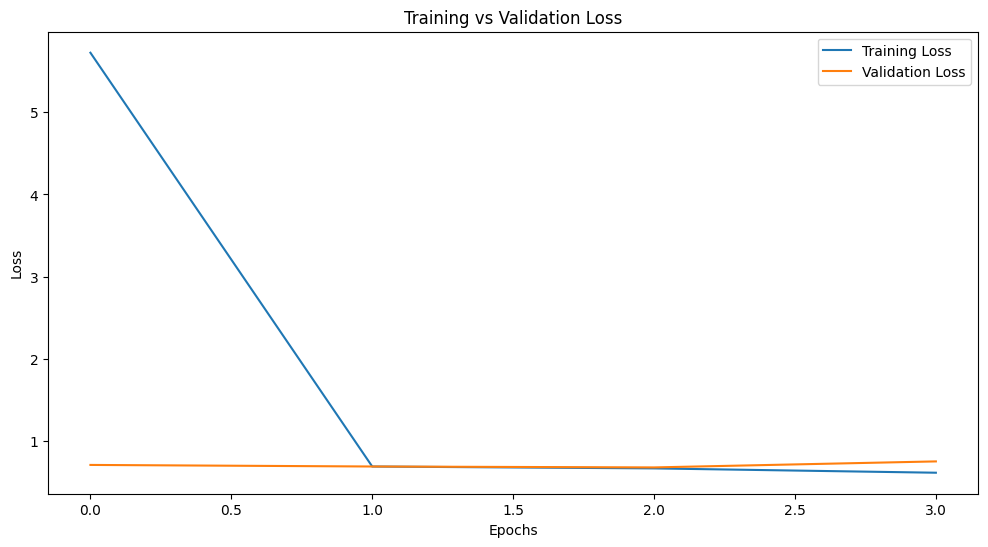

KeyError: 'recall'

<Figure size 1200x600 with 0 Axes>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D
import matplotlib.pyplot as plt

# Sample input data (replace with your actual data)
train = np.random.rand(1000, 1491, 257)  # Example shape for training data
test = np.random.rand(200, 1491, 257)   # Example shape for testing data

# Sample labels for binary classification (1D array with values 0 or 1)
train_labels = np.random.randint(2, size=(1000, 1))  # Shape (1000, 1)
test_labels = np.random.randint(2, size=(200, 1))    # Shape (200, 1)

# Ensure the data has the correct shape for the Conv2D layer (adding channel dimension)
train = np.expand_dims(train, axis=-1)  # Shape becomes (num_samples, 1491, 257, 1)
test = np.expand_dims(test, axis=-1)    # Shape becomes (num_samples, 1491, 257, 1)

# Check if there are any NaN values in the data
if np.any(np.isnan(train)):
    print("Warning: NaN values found in the training data!")
    train = np.nan_to_num(train)  # Replace NaN with 0

if np.any(np.isnan(test)):
    print("Warning: NaN values found in the test data!")
    test = np.nan_to_num(test)  # Replace NaN with 0

print(f"Train data shape: {train.shape}")  # Should print (num_samples, 1491, 257, 1)
print(f"Test data shape: {test.shape}")    # Should print (num_samples, 1491, 257, 1)

# Build the model
model = Sequential()

# Add Conv2D layers with MaxPooling2D to reduce spatial dimensions
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(1491, 257, 1)))
model.add(MaxPooling2D((2, 2)))  # Pooling layer to reduce spatial dimensions
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))  # Another pooling layer

# Flatten the output from the Conv2D layers
model.add(Flatten())

# Add Dense layers
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # For binary classification

# Compile the model with the necessary metrics (Recall and Precision)
model.compile(optimizer='Adam',
              loss='BinaryCrossentropy',
              metrics=['accuracy', tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])

# Print model summary to verify the architecture and layer shapes
model.summary()

# Train the model with 4 epochs, using the training and testing data
hist = model.fit(train, train_labels, epochs=4, validation_data=(test, test_labels))

# Plot the loss curves (Training vs Validation Loss)
plt.figure(figsize=(12, 6))
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



In [ ]:
import numpy as np
import pandas as pd
from scipy.io import wavfile
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import librosa

# Define the paths for the two categories (yes_drone and unknown)
yes_drone_path = '/kaggle/input/drone-dataset/Binary_Drone_Audio/yes_drone'
unknown_path = '/kaggle/input/drone-dataset/Binary_Drone_Audio/unknown'

# Initialize lists to store file paths, labels, sampling rates, and durations
file_paths = []
labels = []
sampling_rates = []
durations = []
errors = []
mfccs = []  # To store the extracted MFCC features

# Function to extract WAV info and features (MFCC)
def get_wav_info(file_path):
    try:
        # Use librosa to load the file and extract features
        audio, sr = librosa.load(file_path, sr=None)
        # Extract MFCC features (Mel-frequency cepstral coefficients)
        mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
        mfccs.append(np.mean(mfcc.T, axis=0))  # Take mean of MFCCs across time frames
        duration = librosa.get_duration(y=audio, sr=sr)
        return {"sampling_rate": sr, "duration": duration}
    except Exception as e:
        return {"error": str(e)}

# Load audio files from 'yes_drone' directory
for filename in os.listdir(yes_drone_path):
    file_path = os.path.join(yes_drone_path, filename)
    if file_path.endswith('.wav'):  # Ensure you're only picking up audio files
        file_paths.append(file_path)
        labels.append('yes_drone')
        wav_info = get_wav_info(file_path)
        sampling_rates.append(wav_info.get("sampling_rate"))
        durations.append(wav_info.get("duration"))
        errors.append(wav_info.get("error"))

# Load audio files from 'unknown' directory
for filename in os.listdir(unknown_path):
    file_path = os.path.join(unknown_path, filename)
    if file_path.endswith('.wav'):  # Ensure you're only picking up audio files
        file_paths.append(file_path)
        labels.append('unknown')
        wav_info = get_wav_info(file_path)
        sampling_rates.append(wav_info.get("sampling_rate"))
        durations.append(wav_info.get("duration"))
        errors.append(wav_info.get("error"))

# Create a DataFrame to organize the data
audio_data = pd.DataFrame({
    'file_path': file_paths,
    'label': labels,
    'sampling_rate': sampling_rates,
    'duration': durations,
    'error': errors
})

# Display the first few rows of the DataFrame
print(audio_data.head())
print(audio_data)

# Count the occurrences of each label (yes_drone and unknown)
label_counts = audio_data['label'].value_counts()
print("Label counts:\n", label_counts)

# Print any errors encountered
print("Errors encountered during audio file processing:")
print(audio_data[audio_data['error'].notnull()])

# Handle any errors (removing rows with errors)
audio_data = audio_data[audio_data['error'].isnull()]

# Encode the labels (yes_drone -> 1, unknown -> 0)
label_encoder = LabelEncoder()
audio_data['label'] = label_encoder.fit_transform(audio_data['label'])

# Prepare the features (MFCCs) and labels
X = np.array(mfccs)  # Features: MFCCs
y = audio_data['label'].values  # Labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a classifier (RandomForest in this case)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

# Optional: Save the model for later use
import joblib
joblib.dump(model, 'drone_audio_classifier.pkl')

# You can also load the model later using:
# model = joblib.load('drone_audio_classifier.pkl')



/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1266
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=24
  warnings.warn(


                                           file_path      label  \
0  /kaggle/input/drone-dataset/Binary_Drone_Audio...  yes_drone   
1  /kaggle/input/drone-dataset/Binary_Drone_Audio...  yes_drone   
2  /kaggle/input/drone-dataset/Binary_Drone_Audio...  yes_drone   
3  /kaggle/input/drone-dataset/Binary_Drone_Audio...  yes_drone   
4  /kaggle/input/drone-dataset/Binary_Drone_Audio...  yes_drone   

   sampling_rate  duration error  
0          16000     1.024  None  
1          16000     1.024  None  
2          16000     1.024  None  
3          16000     1.024  None  
4          16000     1.024  None  
                                               file_path      label  \
0      /kaggle/input/drone-dataset/Binary_Drone_Audio...  yes_drone   
1      /kaggle/input/drone-dataset/Binary_Drone_Audio...  yes_drone   
2      /kaggle/input/drone-dataset/Binary_Drone_Audio...  yes_drone   
3      /kaggle/input/drone-dataset/Binary_Drone_Audio...  yes_drone   
4      /kaggle/input/drone-datas

['drone_audio_classifier.pkl']